In [125]:
# HW-1 - Analyzing donors data

# Import essential packages/libs
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


path='/Users/venkatasharatsripada/Documents/Masters@Syracuse/Course-Related(Study)/IST-652/HW1/Donors_Data.csv'

# Read the csv file into a data-frame
df = pd.read_csv(path, sep=',')

# Check for any null/Nan values
is_null = df.isnull().values.any()
print('Null values not present') if not is_null else print('Null values present')

# Data-analysis, pre-processing and cleanup
print('\n --- Display head of data --- \n {0}'.format(df.head()))
print('\n --- Display tail of data --- \n {0}'.format(df.tail()))

# Get rows/columns or data dimensions
print('\n Shape/dim of data = {0}'.format(df.shape))

# Inspect column-names 
print('\n -- Column-names -- \n {0}'.format(df.columns))

# print(dir(df))

# Assign Column 'Row Id' as the index
df = df.set_index('Row Id')

df.head()

Null values not present

 --- Display head of data --- 
    Row Id  Row Id.  zipconvert_2  zipconvert_3  zipconvert_4  zipconvert_5  \
0       1       17             0             1             0             0   
1       2       25             1             0             0             0   
2       3       29             0             0             0             1   
3       4       38             0             0             0             1   
4       5       40             0             1             0             0   

   homeowner dummy  NUMCHLD  INCOME  gender dummy  ...  IC15  NUMPROM  \
0                1        1       5             1  ...     1       74   
1                1        1       1             0  ...     4       46   
2                0        2       5             1  ...    13       32   
3                1        1       3             0  ...     4       94   
4                1        1       4             0  ...     7       20   

   RAMNTALL  MAXRAMNT  LASTGIFT  to

,Row Id.,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner dummy,NUMCHLD,INCOME,gender dummy,WEALTH,...,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B,TARGET_D
Row Id,,,,,,,,,,,,,,,,,,,,,
1,17,0,1,0,0,1,1,5,1,9,...,1,74,102.0,6.0,5.0,29,3,4.857143,1,5.0
2,25,1,0,0,0,1,1,1,0,7,...,4,46,94.0,12.0,12.0,34,6,9.400000,1,10.0
3,29,0,0,0,1,0,2,5,1,8,...,13,32,30.0,10.0,5.0,29,7,4.285714,1,5.0
4,38,0,0,0,1,1,1,3,0,4,...,4,94,177.0,10.0,8.0,30,3,7.080000,0,0.0
5,40,0,1,0,0,1,1,4,0,8,...,7,20,23.0,11.0,11.0,30,6,7.666667,0,0.0


zipconvert_2 total donation - 4194.37
zipconvert_3 total donation - 3172.0
zipconvert_4 total donation - 4314.5
zipconvert_5 total donation - 8597.92


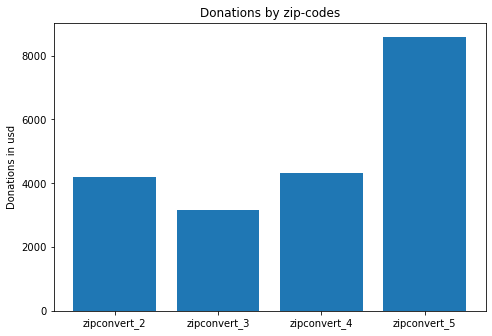

In [107]:
# Data-analysis 1: Analyze donations based on zip-code
# For this we will retain only the relevant columns:
#  - zipconvert_2, zipconvert_3, zipconvert_4, zipconvert_5
#  - TARGET_B, TARGET_D
df_zipcodes = df[['zipconvert_2', 'zipconvert_3', 'zipconvert_4', \
                  'zipconvert_5', 'TARGET_B', 'TARGET_D']].copy()
df_zipcodes.head()

# Further, let's filter out for cases where TARGET_B == 1 i.e, get donors
is_donor = df_zipcodes['TARGET_B'] == 1
df_zipcodes = df_zipcodes[is_donor]

df_zipcodes.head()

# Group-by zip-code and calculate the sum of donations
def get_donation_sum(df):
    # Initialize a list and plt imported from matplotlib
    zip_codes = []
    donations = []
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    for col in df.columns:
        if 'zip' in col:
            is_zip = df[col] == 1
            df_tmp = df[is_zip]
            zip_codes.append(col)
            donations.append(sum(df_tmp['TARGET_D']))
            print('{0} total donation - {1}'.format(col, sum(df_tmp['TARGET_D'])))
    ax.bar(zip_codes, donations)
    ax.set_title('Donations by zip-codes')
    ax.set_ylabel('Donations in usd')
    plt.show()
            
            
get_donation_sum(df_zipcodes)

# Conclusion: This clearly shows that zipconvert_5 had the highest donations:
# Output:
# zipconvert_2 total donation - 4194.37
# zipconvert_3 total donation - 3172.0
# zipconvert_4 total donation - 4314.5
# zipconvert_5 total donation - 8597.92


zip: zipconvert_2
-----------------
Median wealth - 8.0
Population: 669, Donors: 337(50.37%)
Per-capita donation amt. = 6.27
zip: zipconvert_3
-----------------
Median wealth - 8.0
Population: 578, Donors: 281(48.62%)
Per-capita donation amt. = 5.49
zip: zipconvert_4
-----------------
Median wealth - 8.0
Population: 669, Donors: 326(48.73%)
Per-capita donation amt. = 6.45
zip: zipconvert_5
-----------------
Median wealth - 8.0
Population: 1200, Donors: 616(51.33%)
Per-capita donation amt. = 7.16


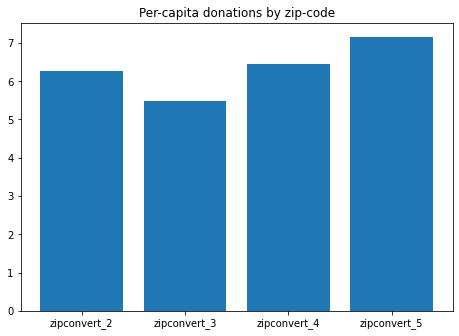

In [108]:
# Data-analysis 2: Determine factors that lead to high contributions
#  - determine min, max, median wealth-rating 
#  - population density

df_wealth = df[['zipconvert_2', 'zipconvert_3', 'zipconvert_4', \
                'zipconvert_5', 'WEALTH', 'TARGET_B', 'TARGET_D']].copy()

def get_wealth_stats(df):
    donation_per_capita = []
    zip_codes = []
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    for col in df.columns:
        if 'zip' in col:
            zip_codes.append(col)
            is_zip = df[col] == 1
            df_tmp = df[is_zip]
            pop = df_tmp.shape[0]
            print('zip: {0}'.format(col))
            print('-----------------')
            print('Median wealth - {0}'.format(df_tmp['WEALTH'].median()))
            is_donor = df_tmp['TARGET_B'] == 1
            df_tmp = df_tmp[is_donor]
            donor_pop = df_tmp.shape[0]
            donation_per_capita.append(sum(df_tmp['TARGET_D'])/pop)
            print('Population: {:d}, Donors: {:d}({:.2f}%)'.format(pop, 
                                                               donor_pop,
                                                               donor_pop/pop * 100))
            print('Per-capita donation amt. = {:.2f}'.format(sum(df_tmp['TARGET_D'])/pop))  
    ax.bar(zip_codes, donation_per_capita)
    ax.set_title('Per-capita donations by zip-code')
    plt.show()
            
get_wealth_stats(df_wealth)

# Conclusion: While the overall donations could be higher due to population, key takeaways: 
#     - min, max, median wealth-index across 4 locations comparable
#     - donation per-capita (zip-code) in '5' is 11%, 30% and 14% higher than '4', '3' & '2' respectively

INCOME vs TARGET_D = 0.08032548338264088
WEALTH vs TARGET_D = 0.03364409638488519
HV vs TARGET_D = 0.09893176886948857
Icmed vs TARGET_D = 0.08868927276618381
IC15 vs TARGET_D = -0.03959393387635995
NUMPROM vs TARGET_D = 0.02227075151408228
RAMNTALL vs TARGET_D = 0.11061262841820582
MAXRAMNT vs TARGET_D = 0.17810380290309843
totalmonths vs TARGET_D = 0.01115897079293302
AVGGIFT vs TARGET_D = 0.3266346106284295


Text(0.5, 1.0, 'Correlation-plots (vs TARGET_D)')

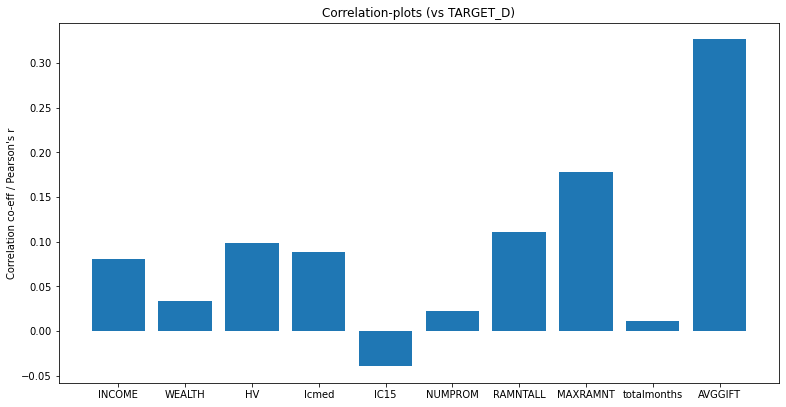

In [126]:
# Analysis-3: Finally, let's use linear-regression to measure any correlation
#  - conventionally, we should be able run a Parsimonious model and determine the most correlated params
#  - using the corr() function to check correlation for a few params

df_corr = df[['INCOME', 'WEALTH', 'HV', 'Icmed', \
              'IC15', 'NUMPROM', 'RAMNTALL', 'MAXRAMNT', \
              'totalmonths', 'AVGGIFT', 'TARGET_D']].copy()

# Initialize plot
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
                
plot_dict={}
for col in df_corr.columns:
    if 'TARGET_D' not in col:
        corr = df_corr[col].corr(df_corr['TARGET_D'])
        print('{0} vs TARGET_D = {1}'.format(col, corr))
        plot_dict[col] = corr

ax.bar(plot_dict.keys(), plot_dict.values())
ax.set_ylabel("Correlation co-eff / Pearson's r")
ax.set_title('Correlation-plots (vs TARGET_D)')

# Output:
# INCOME vs TARGET_D = 0.08032548338264088
# WEALTH vs TARGET_D = 0.03364409638488519
# HV vs TARGET_D = 0.09893176886948857
# Icmed vs TARGET_D = 0.08868927276618381
# IC15 vs TARGET_D = -0.03959393387635995
# NUMPROM vs TARGET_D = 0.02227075151408228
# RAMNTALL vs TARGET_D = 0.11061262841820582
# MAXRAMNT vs TARGET_D = 0.17810380290309843
# totalmonths vs TARGET_D = 0.01115897079293302
# AVGGIFT vs TARGET_D = 0.3266346106284295

# Conclusion: 
# AVGGIFT among all the variables has the highest correlation to TARGET_D at 0.3. 
# Ideally, we would like the correlation to be closer to 1.0 to show strong correlation.

# NOTE - Strong correlation need not mean strong causation but, is still a start. Likely, there is more complex
# relationship between the data and TARGET_D and this needs to be explored with other machine-learning techniques.

